In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [4]:
data.shape

(1338, 8)

In [5]:
data.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1001.000000,18.000000,15.960000,0.000000,1121.873900
25%,1335.250000,27.000000,26.296250,0.000000,4740.287150
50%,1669.500000,39.000000,30.400000,1.000000,9382.033000
75%,2003.750000,51.000000,34.693750,2.000000,16639.912515
max,2338.000000,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1001,19,female,27.900,0,yes,southwest,16884.92400
1,1002,18,male,33.770,1,no,southeast,1725.55230
2,1003,28,male,33.000,3,no,southeast,4449.46200
3,1004,33,male,22.705,0,no,northwest,21984.47061
4,1005,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.charges.value_counts()

1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100    1
              ..
62592.87309    1
18903.49141    1
8538.28845     1
11165.41765    1
60021.39897    1
Name: charges, Length: 1337, dtype: int64

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

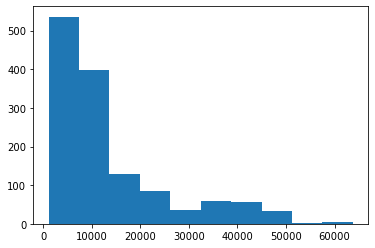

In [9]:
plt.hist(data.charges)

In [10]:
numerical=data.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

5


Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')

In [11]:
categorical=data.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

3


Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
dummy_enc=pd.get_dummies(categorical,drop_first=True)

In [13]:
dummy_data=pd.concat([dummy_enc,numerical],axis=1)

In [14]:
dummy_data.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,id,age,bmi,children,charges
0,0,1,0,0,1,1001,19,27.900,0,16884.92400
1,1,0,0,1,0,1002,18,33.770,1,1725.55230
2,1,0,0,1,0,1003,28,33.000,3,4449.46200
3,1,0,1,0,0,1004,33,22.705,0,21984.47061
4,1,0,1,0,0,1005,32,28.880,0,3866.85520


<AxesSubplot:title={'center':'sex'}>

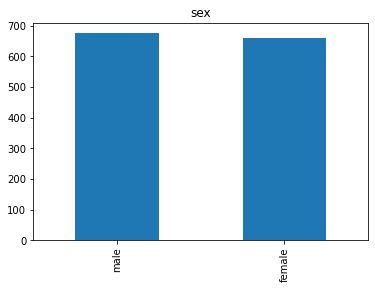

In [15]:
data['sex'].value_counts().plot(kind='bar',title='sex')

<AxesSubplot:title={'center':'smoker'}>

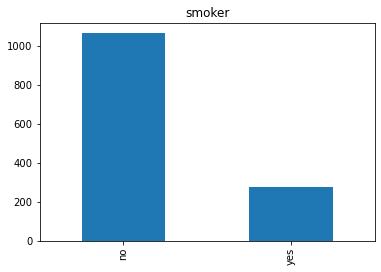

In [16]:
data['smoker'].value_counts().plot(kind='bar',title='smoker')

<AxesSubplot:title={'center':'region'}>

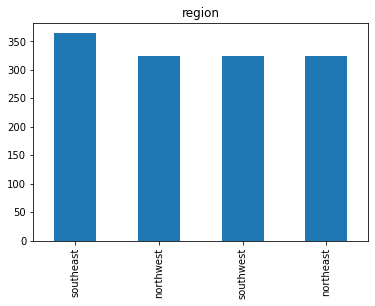

In [17]:
data['region'].value_counts().plot(kind='bar',title='region')

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

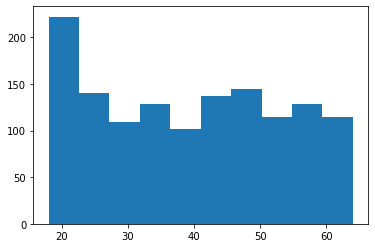

In [18]:
plt.hist(data['age'])

Text(0.5, 1.0, 'Boxplot of charges')

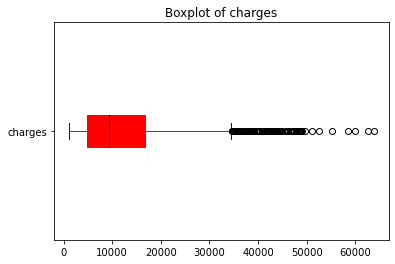

In [19]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
data.charges.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of charges')

In [20]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_male          1338 non-null   uint8  
 1   smoker_yes        1338 non-null   uint8  
 2   region_northwest  1338 non-null   uint8  
 3   region_southeast  1338 non-null   uint8  
 4   region_southwest  1338 non-null   uint8  
 5   id                1338 non-null   int64  
 6   age               1338 non-null   int64  
 7   bmi               1338 non-null   float64
 8   children          1338 non-null   int64  
 9   charges           1338 non-null   float64
dtypes: float64(2), int64(3), uint8(5)
memory usage: 58.9 KB


In [21]:
data.drop('id',axis=1,inplace=True)

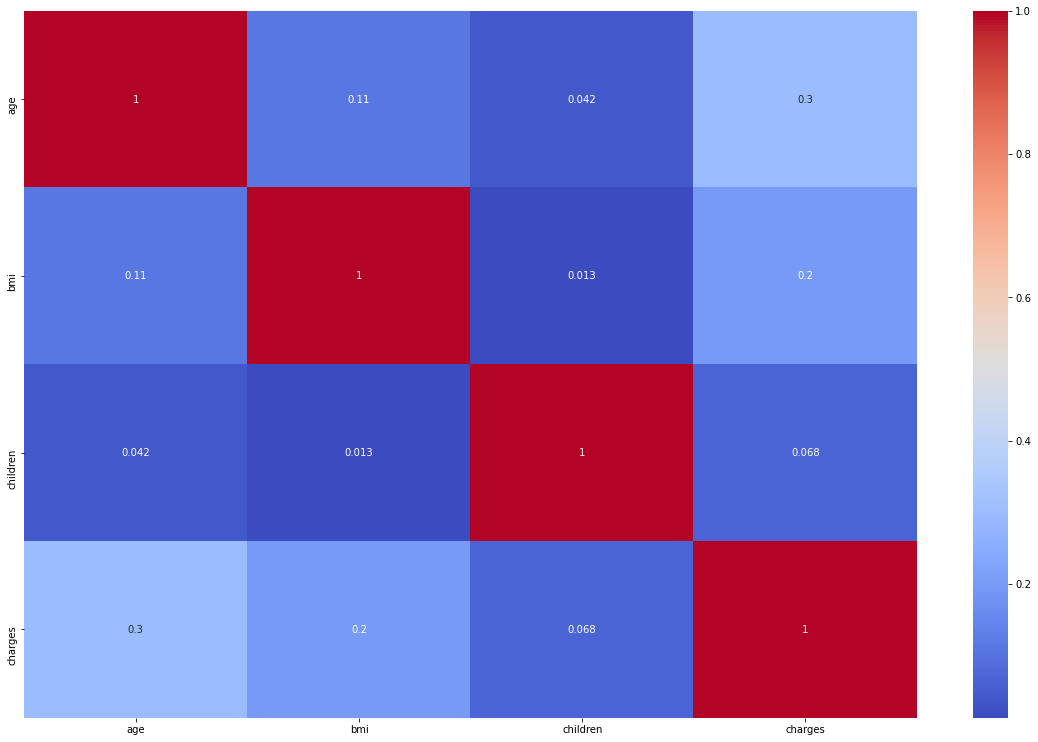

In [22]:
plt.figure(figsize=(20,13))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [23]:
x=dummy_data.drop('charges',axis=1)
y=dummy_data['charges']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=25)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 9)
(402, 9)
(936,)
(402,)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              777.5
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                        0.00
Time:                        05:34:27   Log-Likelihood:                         -9488.3
No. Observations:                 936   AIC:                                  1.899e+04
Df Residuals:                     927   BIC:                                  1.904e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [30]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)
l_acc = r2_score(y_test,l_reg.predict(x_test))

In [31]:
(l_reg.score(x_train,y_train))

0.7579640890983314

In [32]:
(l_reg.score(x_test,y_test))

0.7298279299311946

In [33]:
import statsmodels.formula.api as smf

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
model1=smf.ols(formula='charges ~ age + C(sex) + bmi + children + C(smoker) + C(region)',data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        05:38:46   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

In [36]:
pred1=model1.predict()
error1=data.charges - pred1


In [37]:
import seaborn as sns

Text(0.5, 6.79999999999999, 'errors')

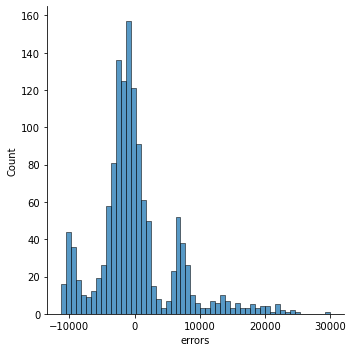

In [38]:
sns.displot(error1)
plt.xlabel('errors')

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

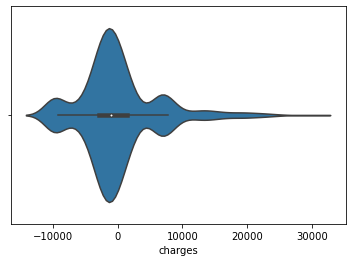

In [39]:
sns.violinplot(error1)

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


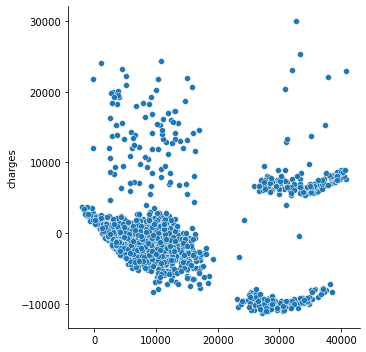

In [40]:
sns.relplot(pred1, error1)